In [56]:
import numpy
import scipy.special
import matplotlib.pyplot
%matplotlib inline
from __future__ import division

class neuralNetwork:
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        self.lr = learningrate
        
        self.wih = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.onodes, -0.5), (self.onodes, self.hnodes))
        self.activation_function = lambda x:scipy.special.expit(x)
        
    def train(self, inputs_list, targets_list):
        inputs = numpy.array(inputs_list, ndmin = 2).T
        targets = numpy.array(targets_list, ndmin = 2).T        
        
        hidden_inputs = numpy.dot(self.wih, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        
        final_inputs = numpy.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
        
        output_errors = targets - final_outputs
        hidden_errors = numpy.dot(self.who.T, output_errors)
        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), numpy.transpose(hidden_outputs))
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), numpy.transpose(inputs))        
    
    def query(self, inputs_list):
        inputs = numpy.array(inputs_list, ndmin = 2).T
        hidden_inputs = numpy.dot(self.wih, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        final_inputs = numpy.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs
    
input_nodes = 784
hidden_nodes = 100
output_nodes = 10
learning_rate = 0.3

n = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

In [68]:
training_data_file = open("mnist_train.csv","r")
training_data_list = training_data_file.readlines()
training_data_file.close()

In [69]:
for record in training_data_list:
    all_values = record.split(",")
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 *0.99) + 0.01
    targets = numpy.zeros(output_nodes) + 0.01
    targets[int(all_values[0])] = 0.99
    n.train(inputs, targets)
    pass

In [70]:
test_data_file = open("mnist_test.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

1


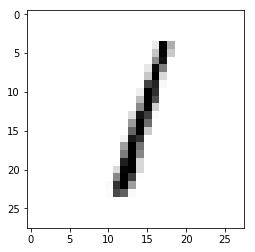

In [71]:
all_values = test_data_list[2].split(',')
print all_values[0]
image_array = numpy.asfarray(all_values[1:]).reshape((28, 28))
matplotlib.pyplot.imshow(image_array, cmap = "Greys", interpolation = "None")

In [72]:
n.query((numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01)

array([[0.00330139],
       [0.99723549],
       [0.00131124],
       [0.00325407],
       [0.01065396],
       [0.00707878],
       [0.00491074],
       [0.00263276],
       [0.00164091],
       [0.00756475]])

In [73]:
scorecard=[]
for record in test_data_list:
    all_values = record.split(',')
    correct_label = int(all_values[0])
    #print correct_label, "correct label"
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    outputs = n.query(inputs)
    label = numpy.argmax(outputs)
    #print label, "network's answer"
    if label == correct_label:
        scorecard.append(1)
    else:
        scorecard.append(0)

scorecard_array = numpy.asarray(scorecard)
print "performance = ", (scorecard_array.sum() / scorecard_array.size)

performance =  0.9424


In [92]:
import scipy.misc
from PIL import Image

image = Image.open("num2.png")

image.thumbnail((28, 28), Image.ANTIALIAS) # 生成缩略图
image.save('num2_convert', 'PNG')    # 保存到原路径

img_array = scipy.misc.imread('num2_convert', flatten = True)
img_data = 255.0 - img_array.reshape(784)
img_data = (img_data / 255.0 * 0.99) + 0.01

C:\Python27\ana\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  if __name__ == '__main__':


In [95]:
import numpy as np
np.set_printoptions(suppress=True)
n.query(img_data)

array([[0.00145447],
       [0.00025583],
       [0.77313657],
       [0.00164896],
       [0.00154182],
       [0.00357091],
       [0.00393081],
       [0.00040556],
       [0.00000241],
       [0.00049717]])